# ECE 175A
## By: Jay Paek

In [1]:
from scipy.io import loadmat as load
import scipy.io as sio
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
# import cupy as np

Prepare datasets.

In [2]:
data = load('data.mat')
train_data = data['imageTrain'].astype('int').reshape((784,5000)).T
train_labels = data['labelTrain'].reshape((5000,))
test_data = data['imageTestNew'].astype('int').reshape((784,500)).T
test_labels = data['labelTestNew'].reshape((500,))

Text(0.5, 1.0, 'sampletest.png')

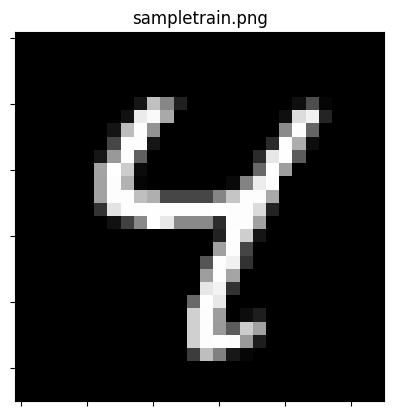

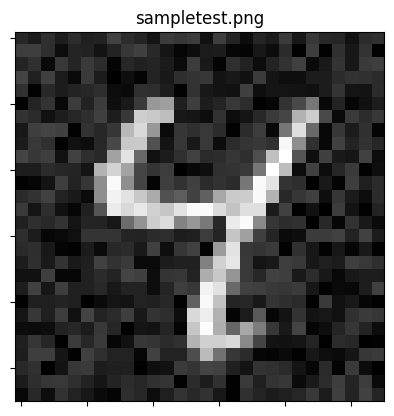

In [3]:
sampletrain = img.imread('sampletrain.png').reshape((784,1))
sampletest = img.imread('sampletest.png').reshape((784,1))
ax, arr = plt.subplots(1,1)
arr.imshow(sampletrain.reshape((28,28)), cmap='gray')
arr.set_yticklabels([])
arr.set_xticklabels([])
arr.set_title(f'sampletrain.png')
ax, arr = plt.subplots(1,1)
arr.imshow(sampletest.reshape((28,28)), cmap='gray')
arr.set_yticklabels([])
arr.set_xticklabels([])
arr.set_title(f'sampletest.png')

## Problem 1
Using the two sample images sampletest.png and sampletrain.png (i) calculate the ML estimate of the scale parameter ‘a’.

We have the following linear equation for the noisy data:
$$\textbf{Y} = a\textbf{X} + \textbf{N}$$
where \textbf{Y} is the noisy image, \textbf{X} is the original image, \textbf{N} is the random noise, and $a$ is the scalar that will optimize the error between the noisy image and original image. This can be formulated as a least square problem:
$$\min_a ||y - xa||$$
where x,y are vectorized form of the images.
We can just solving this least square image with the pseudoinverse since we know that columns vectors are linear independent.
$$a = (x^Tx)^{-1}x^Ty = (||x||_2^2)^{-1}x^Ty = \frac{\langle x, y \rangle}{||x||_2^2}$$
or similarly:
$$a = pinv(x)y$$

In [4]:
a1 = (np.linalg.pinv(sampletrain)@sampletest)[0][0]
a2 = ((sampletrain.T@sampletest)/(np.linalg.norm(sampletrain)**2))[0][0]
print(a1)
print(a2)

0.67961836
0.67961836


both methods of calculations seem to concur.

## Problem 2
Now for the new testset testImagesNew, perform the task of classification using the least square
distance metric. As before, Compute and plot the error rates for each class, and the total error
rate. 
First transform all of the training data.

In [5]:
noisy_training = a1*train_data

In [6]:
predictions = []
closest = []
for image in test_data:
    close = np.argmin(np.linalg.norm(image-noisy_training, axis=1))
    predictions.append(train_labels[close])
    closest.append(close)

In [7]:
expected = []
predicted = [0] * 10
for i in range(10):
    expected.append(np.count_nonzero(test_labels == i))
for i in range(len(test_labels)):
    answer = test_labels[i]
    if answer == predictions[i]:
        predicted[answer] += 1

Text(0.5, 0, 'Class')

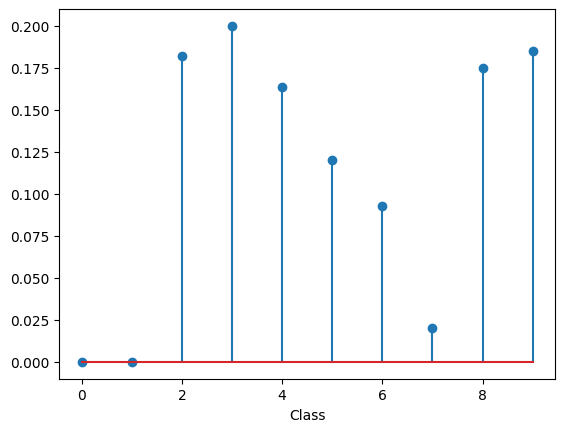

In [8]:
plt.stem([1-predicted[i]/expected[i] for i in range(10)])
plt.xlabel('Class')

In [9]:
print(f'Total Error Rate: {1-sum(predicted)/sum(expected)}')

Total Error Rate: 0.11199999999999999


## Problem 3
Perform a NN classification on the new testset, using the algorithm of Computer Problem 1, i.e.
using Euclidean distance metric. Compare your results with the NN classification performed in
part 2.

In [45]:
predictions = []
closest = []
for image in test_data:
    close = np.argmin(np.linalg.norm(image-train_data, axis=1))
    predictions.append(train_labels[close])
    closest.append(close)

In [46]:
expected = []
predicted = [0] * 10
for i in range(10):
    expected.append(np.count_nonzero(test_labels == i))
for i in range(len(test_labels)):
    answer = test_labels[i]
    if answer == predictions[i]:
        predicted[answer] += 1

Text(0.5, 0, 'Class')

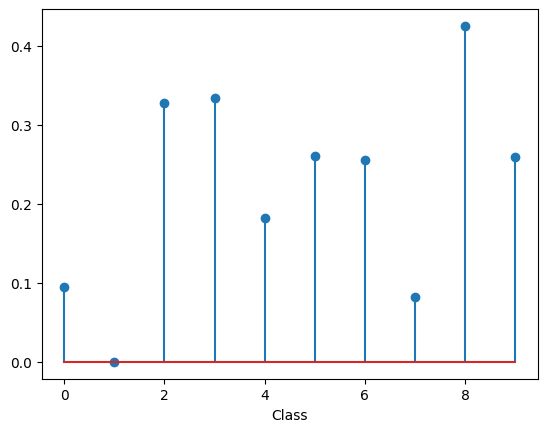

In [47]:
plt.stem([1-predicted[i]/expected[i] for i in range(10)])
plt.xlabel('Class')

In [48]:
print(f'Total Error Rate: {1-sum(predicted)/sum(expected)}')

Total Error Rate: 0.21199999999999997


The maximum likelihood estimate of the noisy data performs significiantly better than the knn algorithm, almost decreasing the error rate by 10 percent. This is because the linear model allows the noisy data to be closer to the original training data. 